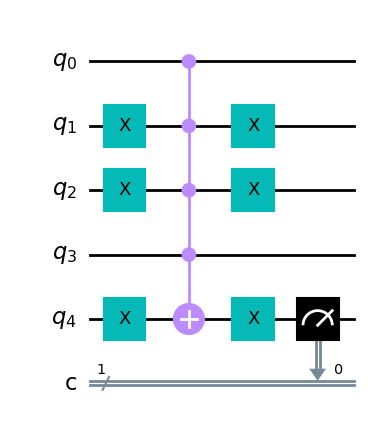

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import XGate
from qiskit.visualization import circuit_drawer

def build_oracle(input_string):
    # Determine number of qubits needed to represent the input string
    num_qubits = len(input_string)
    
    # Create a quantum circuit with the required number of qubits and a single output bit
    qr = QuantumRegister(num_qubits, name='q')
    cr = ClassicalRegister(1, name='c')
    circuit = QuantumCircuit(qr, cr)
    
    # Apply an X gate to each qubit that corresponds to a '1' in the input string
    for i in range(num_qubits):
        if input_string[i] == '1':
            circuit.x(qr[i])
    
    # Apply a multi-controlled Z gate to flip the phase of the input state
    mc_z_gate = XGate().control(num_qubits-1)
    circuit.append(mc_z_gate, qr)
    
    # Uncompute the X gates applied earlier
    for i in range(num_qubits):
        if input_string[i] == '1':
            circuit.x(qr[i])
    
    # Measure the output qubit
    circuit.measure(qr[num_qubits-1], cr[0])
    
    return circuit

input_string = '01101'
oracle = build_oracle(input_string)
circuit_drawer(oracle, output='mpl')